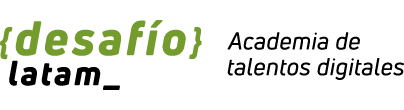

#<center><strong><font color="green">Solución Desafío - Variable aleatoria (Parte I)</font></strong></center>

Carga de datos y librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, percentileofscore

dataset = pd.read_csv("baby.csv")

In [2]:
dataset.columns


Index(['Unnamed: 0', 'Birth.Weight', 'Gestational.Days', 'Maternal.Age',
       'Maternal.Height', 'Maternal.Pregnancy.Weight', 'Maternal.Smoker'],
      dtype='object')

1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [3]:
dataset.dropna().describe()

Unnamed: 0  Birth.Weight  Gestational.Days  Maternal.Age  \
count  1174.000000   1174.000000       1174.000000   1174.000000   
mean    587.500000    119.462521        279.101363     27.228279   
std     339.048915     18.328671         16.010305      5.817839   
min       1.000000     55.000000        148.000000     15.000000   
25%     294.250000    108.000000        272.000000     23.000000   
50%     587.500000    120.000000        280.000000     26.000000   
75%     880.750000    131.000000        288.000000     31.000000   
max    1174.000000    176.000000        353.000000     45.000000   

       Maternal.Height  Maternal.Pregnancy.Weight  
count      1174.000000                1174.000000  
mean         64.049404                 128.478705  
std           2.526102                  20.734282  
min          53.000000                  87.000000  
25%          62.000000                 114.250000  
50%          64.000000                 125.000000  
75%          66.000000                 139.000000  
max          72.000000                 250.000000

2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

In [4]:
pesos= dataset['Birth.Weight'].dropna() #seleccionamos los datos
#calculamos los estadísticos para construir un mdelo
mu=pesos.mean()
sigma=pesos.std()
minimo=pesos.min()
maximo=pesos.max()
x = np.linspace(minimo, maximo,100)
pdf = norm.pdf(x, loc=mu, scale=sigma) # creamos la funcion de distribución normal
# Histograma de la data
plt.hist(pesos, bins=100, density=True, alpha=0.5, label='Datos')
plt.plot(x, pdf, color='red', label='Modelo normal')
plt.xlabel('Pesos')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Datos vs modelo')
plt.legend()
plt.show()

Se puede observar que, a pesar de que algunos datos no corresponden con el modelo, la distribución normal se ajusta bastante

3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

Utilizaremos los valores 80, 100, 120, 140 y 160 (son opcionales para cada estudiante)

In [5]:
pesos_prueba = [80,100,120,140,160]

for i in pesos_prueba:
  p_real=round(percentileofscore(pesos,i),2)
  p_modelo=round(100*norm.cdf(i, loc=mu, scale=sigma),2)
  print(f'El percentil real para {i} es {p_real}, y el teórico es {p_modelo}')

El percentil real para 80 es 2.34, y el teórico es 1.57
El percentil real para 100 es 13.8, y el teórico es 14.41
El percentil real para 120 es 50.38, y el teórico es 51.17
El percentil real para 140 es 88.07, y el teórico es 86.88
El percentil real para 160 es 98.47, y el teórico es 98.65


4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Calcula los estadísticos, construye los modelos correspondientes y explica.

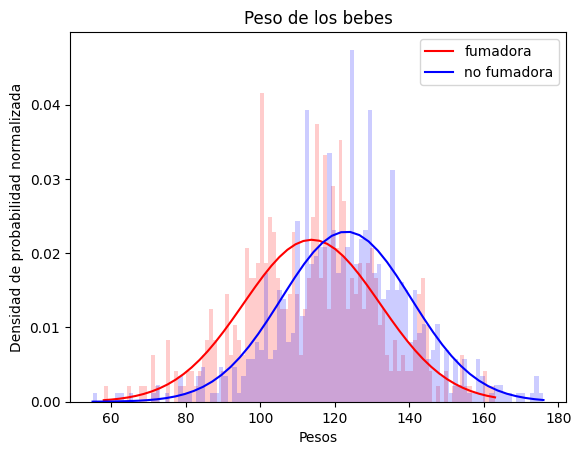

In [6]:
#seleccionamos los datos
fumadora=dataset[dataset['Maternal.Smoker']==True]['Birth.Weight']
nofumadora=dataset[dataset['Maternal.Smoker']==False]['Birth.Weight']
#construimos una funcion que genere los modelos
def get_psd(x):
  mu=x.mean()
  sigma=x.std()
  minimo=x.min()
  maximo=x.max()
  x = np.linspace(minimo, maximo)
  pdf = norm.pdf(x, loc=mu, scale=sigma)
  return(x,pdf)

#plot fumadores
x,pdf=get_psd(fumadora)
plt.plot(x , pdf, color='red', label='fumadora')
x,pdf=get_psd(nofumadora)
plt.plot(x , pdf, color='blue', label='no fumadora')
plt.hist(fumadora, bins=100, density=True, alpha=0.2, color='red')
plt.hist(nofumadora, bins=100, density=True, alpha=0.2, color='blue')
plt.xlabel('Pesos')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Peso de los bebes')
plt.legend()
plt.show()

Se puede observar que los bebés de madres no fumadoras presentan mayores pesos, con mayor media y menor dispersión.

In [7]:
fumadora.describe()

count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth.Weight, dtype: float64

In [8]:
nofumadora.describe()

count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64

5. Construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.
Utilizando este modelo y los datos reales, genera en cada caso 1000 muestras de tamaño 8 con sus respectivas medias muestrales. A partir de ello:

- compáralas gráficamente
- verifica el teorema del límite central, considerando las muestras de datos reales y el modelo normal derivado del modelo binomial.


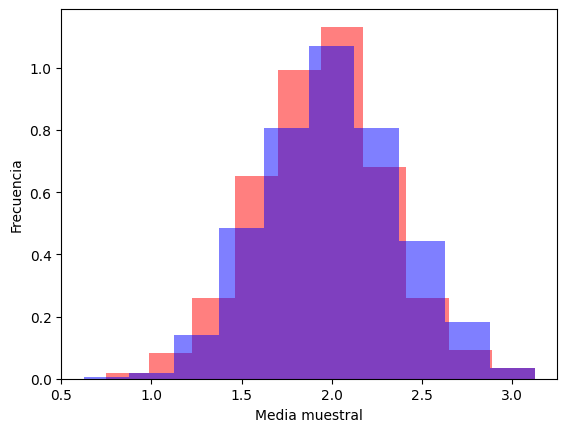

In [9]:
#Seleccionamos los datos y cambiamos los True por 1 y False por cero. Con esto calculamos la probabilidad
datos=dataset['Maternal.Smoker'].dropna()
fuma = np.where(datos, 1, 0)
p=sum(fuma)/len(fuma)

#Generamos las muestras "teoricas" con la distribución binomial, y almacenamos las medias muestrales
medias_binom=[]
for j in range(1000):
  medias_binom.append(np.mean(np.random.binomial(5,p,size=8)))

#escogemos ahora las 1000 muestras de tamaño 8 a partir de los datos reales, y hacemos lo mismo
medias=[]
for k in range(1000):
  muestra=[]
  for t in range(8):
    muestra.append(sum(np.random.choice(fuma,size=5,replace=False)))
  medias.append(np.mean(muestra))

plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')

plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()


Observamos la similitud entre los gráficos.

Veremos ahora lo que ocurre al modelar la situación utilizando una distribución normal.

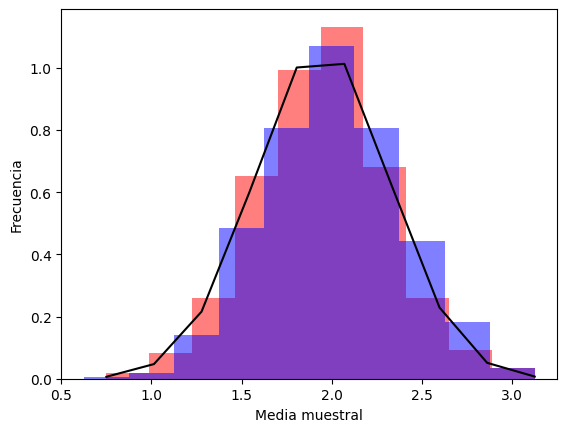

In [15]:
#Vimos que la probabilidad es p. Calculamos la media y desviación teóricas
mu=np.mean(medias)
desv=np.std(medias)
minimo=np.min(medias_binom)
maximo=np.max(medias_binom)
x = np.linspace(minimo, maximo,num=10)
pdf = norm.pdf(x, loc=mu, scale=desv)
a=np.std(medias)
b=np.std(medias_binom)
plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')
plt.plot(x, pdf, color='black', label='Dist. Normal')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()